In [1]:
import numpy as np 
import pandas as pd 
import pandas_datareader as data 
import matplotlib.pyplot as plt
import pickle

In [2]:
start = '2010-01-01'
end = '2019-12-31'
df = data.DataReader('AAPL', 'yahoo', start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


In [3]:
df = df.reset_index()

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


In [5]:
df = df.drop(['Adj Close', 'Date'], axis=1)

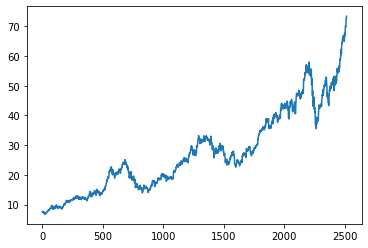

In [6]:
plt.plot(df.Close)

In [48]:
weekma = df.Close.rolling(100).mean()

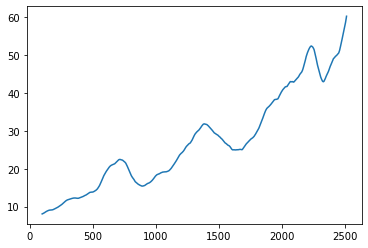

In [49]:
plt.plot(weekma)

In [7]:
df.shape

(2517, 5)

In [8]:
#Splitting into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [9]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [10]:
data_testing.tail()

,Close
2512,71.067497
2513,72.477501
2514,72.449997
2515,72.879997
2516,73.412498


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [12]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape

(1661, 100, 1)

In [15]:
y_train.shape

(1661,)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
52/52 [==============================] - 29s 159ms/step - loss: 0.1606
Epoch 2/100
52/52 [==============================] - 9s 175ms/step - loss: 0.0154
Epoch 3/100
52/52 [==============================] - 13s 245ms/step - loss: 0.0113
Epoch 4/100
52/52 [==============================] - 14s 265ms/step - loss: 0.0109
Epoch 5/100
52/52 [==============================] - 14s 263ms/step - loss: 0.0113
Epoch 6/100
52/52 [==============================] - 8s 155ms/step - loss: 0.0091
Epoch 7/100
52/52 [==============================] - 8s 158ms/step - loss: 0.0088
Epoch 8/100
52/52 [==============================] - 9s 164ms/step - loss: 0.0072
Epoch 9/100
52/52 [==============================] - 9s 164ms/step - loss: 0.0072
Epoch 10/100
52/52 [==============================] - 8s 163ms/step - loss: 0.0079
Epoch 11/100
52/52 [==============================] - 8s 163ms/step - loss: 0.0080
Epoch 12/100
52/52 [==============================] - 8s 163ms/step - loss: 0.0081
Epoch 13/

In [25]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

Saved model to disk


In [41]:
# model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [29]:
inputs = scaler.transform(final_df)
inputs

array([[0.76668248],
       [0.7708505 ],
       [0.76317748],
       [0.76251438],
       [0.7648826 ],
       [0.7771974 ],
       [0.77625005],
       [0.77473443],
       [0.77340823],
       [0.77606063],
       [0.76800868],
       [0.77122943],
       [0.76346165],
       [0.75910413],
       [0.75313622],
       [0.75199945],
       [0.74423167],
       [0.74517895],
       [0.75114692],
       [0.76061982],
       [0.76033558],
       [0.76658773],
       [0.73968465],
       [0.71704442],
       [0.73892687],
       [0.7627038 ],
       [0.79889028],
       [0.83488733],
       [0.82872993],
       [0.81603628],
       [0.81594153],
       [0.81575211],
       [0.82588811],
       [0.80779483],
       [0.80940521],
       [0.81139451],
       [0.81954121],
       [0.80277421],
       [0.81101566],
       [0.80599496],
       [0.81054198],
       [0.81101566],
       [0.81897286],
       [0.82058323],
       [0.83943436],
       [0.84180258],
       [0.85165434],
       [0.848

In [30]:
inputs.shape

(856, 1)

In [31]:
x_test = [] 
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [33]:
y_predicted = (model.predict(x_test)) 

In [34]:
y_predicted.shape

(756, 1)

In [35]:
scaler.scale_

array([0.0378916])

In [36]:
scale = 1/0.0378916
scale 

47.11749845134206

In [37]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [38]:
y_test.shape

(756,)

In [39]:
y_predicted.shape

(756, 1)

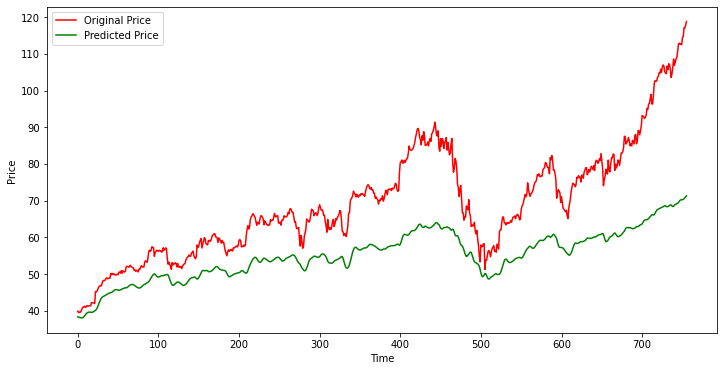

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()